In [118]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

In [119]:
import time

In [120]:
selenium_service = Service('path/to/chromedriver')
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
driver = webdriver.Chrome()

In [121]:
url = "https://www.am730.com.hk/daily-news?cat=&date=2020-11-02"
driver.get(url)



In [158]:
click_element = driver.find_element(By.CSS_SELECTOR, "div.btn.btn-white.border.mx-2.mb-2")

per = len(driver.find_elements(By.CSS_SELECTOR, "div.columnlist")) + len(driver.find_elements(By.CSS_SELECTOR, "div.newslist"))

driver.implicitly_wait(1)

time.sleep(5)

click_element.click()

time.sleep(20)

while (len(driver.find_elements(By.CSS_SELECTOR, "div.columnlist")) + len(driver.find_elements(By.CSS_SELECTOR, "div.newslist")) > per):
    click_element = driver.find_element(By.CSS_SELECTOR, "div.btn.btn-white.border.mx-2.mb-2")

    per = len(driver.find_elements(By.CSS_SELECTOR, "div.columnlist")) + len(driver.find_elements(By.CSS_SELECTOR, "div.newslist"))

    time.sleep(5)

    click_element.click()

    time.sleep(20)

KeyboardInterrupt: 

In [127]:
base_url = "https://www.am730.com.hk"

links = []

blog_links = []

<html class="nav-always no-touch header-fixed leave-top" lang="zh-Hant-HK"><!-- 加上.nav-always for 首頁需要永遠出現 .masthead__nav --><head><script async="" src="https://s0.2mdn.net/instream/video/client.js" type="text/javascript"></script><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js" type="text/javascript"></script><link as="script" href="//rumcdn.geoedge.be/bc7d70b1-7626-49e7-b8c9-a3a4c6ff46be/grumi.js" rel="preload"/><script async="" src="https://www.clarity.ms/s/0.7.12/clarity.js"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/zh_HK/sdk.js?hash=cae1e5f29382e58661e299aadce7f4e8"></script><script id="geoEdge-script">window.grumi = {
        cfg: {
            advs: {
            '18961627': true,
            '4585226541': true,
            '4989168943': true,
            '5219215423': true,
            '4638025810': true,
            '5299938127': true,
            '4637331069': true,
            '5266627872': true,
        
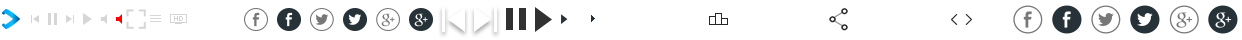
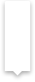
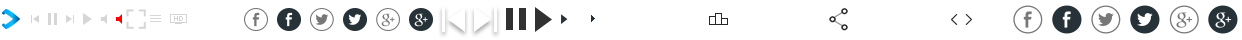

In [128]:
soup = BeautifulSoup(driver.page_source, "html.parser")

soup

In [129]:
content_elements = soup.find_all(class_="newsprime")

content_elements

[<div class="newsprime"><div class="newsitem"><figure class="newsitem-pic" js-hex="#2350A9" style="border-bottom-color: rgb(35, 80, 169);"><a href="/本地/網購墮貨毀賠償連環局-深圳女被騙5萬人民幣/2181"><img alt="網購墮貨毀賠償連環局 深圳女被騙5萬人民幣" class="newsitem-img lazy entered loaded" data-ll-status="loaded" data-src="https://d5ttlem47o98b.cloudfront.net/s3fs-public/styles/cover_720_thumbnail/public/styles/banner/public/news_cover/1604261769_8x.jpg?itok=jCnsN4yR" src="https://d5ttlem47o98b.cloudfront.net/s3fs-public/styles/cover_720_thumbnail/public/styles/banner/public/news_cover/1604261769_8x.jpg?itok=jCnsN4yR"/></a> <div class="newsitem-type badge-edition bg-slate"><i class="ico ico-newspaper"></i>日報</div></figure> <div class="newsitem-entry"><h6 class="newsitem-title"><a href="/本地/網購墮貨毀賠償連環局-深圳女被騙5萬人民幣/2181">網購墮貨毀賠償連環局 深圳女被騙5萬人民幣</a></h6> <div class="newsitem-meta"><div class="newsitem-unit"><a class="badge" href="/本地" js-hex="#2350A9" style="background-color: rgb(35, 80, 169);">本地</a></div> <div class="newsitem-

In [130]:
links.append(base_url + content_elements[0].findAll("a")[0].get("href"))

links

['https://www.am730.com.hk/本地/網購墮貨毀賠償連環局-深圳女被騙5萬人民幣/2181']

In [131]:
content_elements = soup.find_all(class_="newstwo")[0]

for i in content_elements.find_all(class_="newsitem"):
    links.append(base_url + i.findAll("a")[0].get("href"))

links

['https://www.am730.com.hk/本地/網購墮貨毀賠償連環局-深圳女被騙5萬人民幣/2181',
 'https://www.am730.com.hk/本地/增61無症狀感染者-新疆喀什疫情蔓延鄰州/2180',
 'https://www.am730.com.hk/本地/推-安心出行-app記錄行蹤-張建宗-紀錄只存於用戶手機/2179']

In [132]:
content_elements = soup.find_all(class_="newslist")

content_elements[1]

<div class="newslist"><ul class="newslist-row"><li class="newslist-item"><div class="newsitem"><figure class="newsitem-pic" js-hex="#7725FF" style="border-bottom-color: rgb(119, 37, 255);"><a href="/娛樂/第一代占士邦-辛康納利遺照曝光/2165"><img alt="第一代占士邦 辛康納利遺照曝光" class="newsitem-img" src="https://d5ttlem47o98b.cloudfront.net/s3fs-public/styles/cover_720_thumbnail/public/styles/banner/public/news_cover/1604255902_bk.jpg?itok=QoXNiTV3"/></a> <div class="newsitem-type badge-edition bg-slate"><i class="ico ico-newspaper"></i>日報</div></figure> <div class="newsitem-entry"><h6 class="newsitem-title"><a href="/娛樂/第一代占士邦-辛康納利遺照曝光/2165">第一代占士邦 辛康納利遺照曝光</a></h6> <div class="newsitem-meta"><div class="newsitem-unit"><a class="badge" href="/娛樂" js-hex="#7725FF" style="background-color: rgb(119, 37, 255);">娛樂</a></div> <div class="newsitem-time">2年前</div></div></div></div></li><li class="newslist-item"><div class="newsitem"><figure class="newsitem-pic" js-hex="#7725FF" style="border-bottom-color: rgb(119, 37, 25

In [133]:
for i in range(len(content_elements) - 1):
    for j in content_elements[i].find_all(class_="newsitem"):
        links.append(base_url + j.findAll("a")[0].get("href"))

links

['https://www.am730.com.hk/本地/網購墮貨毀賠償連環局-深圳女被騙5萬人民幣/2181',
 'https://www.am730.com.hk/本地/增61無症狀感染者-新疆喀什疫情蔓延鄰州/2180',
 'https://www.am730.com.hk/本地/推-安心出行-app記錄行蹤-張建宗-紀錄只存於用戶手機/2179',
 'https://www.am730.com.hk/本地/港星-旅遊氣泡-望月底實行-邱騰華-最快月中售票/2178',
 'https://www.am730.com.hk/本地/最後衝刺-美國大選明舉行-特朗普搖擺州催票-奧巴馬助拜登造勢/2177',
 'https://www.am730.com.hk/本地/歷時7個月始選出主席-內會風波引發推撞/2176',
 'https://www.am730.com.hk/本地/混亂情況不只一次-李慧琼料議會難回復平靜/2175',
 'https://www.am730.com.hk/本地/周四提堂-民主派7人涉違特權法被起訴-轟政府濫捕打壓議會抗爭/2174',
 'https://www.am730.com.hk/生活/女生/袁彌明逆市新店-mi-ming-mart/2173',
 'https://www.am730.com.hk/本地/銀礦灣staycation爆疫-增7確診1本地無源頭-待遣返內地女患者掃黃被捕/2172',
 'https://www.am730.com.hk/娛樂/-玉卿嫂-金馬導演張毅病逝/2171',
 'https://www.am730.com.hk/娛樂/未成年誘山下智久開房-飯島愛子被事務所解僱/2170',
 'https://www.am730.com.hk/娛樂/蘇皓兒處女下海乜都玩/2169',
 'https://www.am730.com.hk/娛樂/黎諾懿加油搶火釀意外/2168',
 'https://www.am730.com.hk/娛樂/秦煌跌倒骨裂留院-蔡思貝張振朗勁擔心/2167',
 'https://www.am730.com.hk/娛樂/第一代占士邦-辛康納利遺照曝光/2165',
 'https://www.am730.com.hk/娛樂/-王冠-第4季揭戴妃秘史/2164',
 

In [134]:
content_elements = soup.find_all(class_="columnlist")

content_elements

[<div class="columnlist"><ul class="columnlist-row"><li class="columnlist-item"><div class="columnitem2" js-hex="#384264" style="border-bottom-color: rgb(56, 66, 100);"><div class="columnitem2-entry"><figure class="columnitem2-pic" js-hex="#384264" style="border-bottom-color: rgb(56, 66, 100);"><a href="/column/新聞/建制派沒有人才-人才在哪裡/270491"><img alt="Default Image" class="newsitem-img lazy entered loaded" data-ll-status="loaded" data-src="https://d5ttlem47o98b.cloudfront.net/s3fs-public/news_cover/default_img-720x405.png" src="https://d5ttlem47o98b.cloudfront.net/s3fs-public/news_cover/default_img-720x405.png"/></a> <div class="newsitem-type badge-edition bg-slate"><i class="ico ico-newspaper"></i>日報</div></figure> <h6 class="columnitem2-title"><a href="/column/新聞/建制派沒有人才-人才在哪裡/270491">建制派沒有人才 人才在哪裡</a></h6></div> <div class="columnitem2-meta"><div class="columnitem2-unit"><a class="badge" href="/column/新聞" js-hex="#384264" style="background-color: rgb(56, 66, 100);">新聞</a></div> <div class

In [135]:
for i in range(len(content_elements)):
    for j in content_elements[i].find_all(class_="columnitem2"):
        blog_links.append(base_url + j.findAll("a")[0].get("href"))

blog_links

['https://www.am730.com.hk/column/新聞/建制派沒有人才-人才在哪裡/270491',
 'https://www.am730.com.hk/column/新聞/尋求政治庇護的天真想法/270490',
 'https://www.am730.com.hk/column/新聞/美國大選能解決內部的分歧嗎-/270487',
 'https://www.am730.com.hk/column/新聞/圓頭先生/270486',
 'https://www.am730.com.hk/column/生活/raf-simons-2021春夏系列-消費青春/270485',
 'https://www.am730.com.hk/column/健康/更年期後出血/270484',
 'https://www.am730.com.hk/column/健康/抗疫視像指導運動-助思覺失調患者身心健康/270483',
 'https://www.am730.com.hk/column/新聞/英記茶莊-周年大減價開始/270482',
 'https://www.am730.com.hk/column/生活/伴侶能力低又不長進/270481',
 'https://www.am730.com.hk/column/生活/一客煲仔飯逼近全日熱量/270480',
 'https://www.am730.com.hk/column/財經/人口失蹤/270479',
 'https://www.am730.com.hk/column/財經/疫情下創共贏/270478',
 'https://www.am730.com.hk/column/財經/等待買點/270477',
 'https://www.am730.com.hk/column/財經/美國撕裂會在大選後結束嗎-/270476',
 'https://www.am730.com.hk/column/新聞/裁員港俊/270475',
 'https://www.am730.com.hk/column/財經/四川天兆豬業-1248-/270474',
 'https://www.am730.com.hk/column/財經/阿周電視總裁當亞洲小姐評判/270473',
 'https://www.am730.c

In [154]:
import requests
import random

In [156]:
for i in links:

    response = requests.get(i)

    article = BeautifulSoup(response.content, "html.parser")

    title = article.find_all("h1")[0].text

    aspect = article.find_all(class_="article__head-unit")[0].find_all("a")[0].text

    date_and_time = article.find_all(class_="article__head-time")[0].text

    content = [ j.text for j in article.find_all(class_="article__body")[0].find_all("p")]

    file_name = title.replace(" ", "") + ".txt"

    file = open("am730/" + file_name, "w", encoding='utf-8')

    file.write(title + "\n")

    file.write(aspect + "\n")

    file.write(date_and_time + "\n")

    for j in content:
        file.write(j + "\n")

    file.close()

    time.sleep(10 + random.uniform(1, 5))



KeyboardInterrupt: 

In [157]:
for i in blog_links:

    response = requests.get(i)

    article = BeautifulSoup(response.content, "html.parser")

    title = article.find_all("h1")[0].text

    aspect = article.find_all(class_="article__head-unit")[0].find_all("a")[0].text

    date_and_time = article.find_all(class_="article__head-time")[0].text

    content = [ j.text for j in article.find_all(class_="article__body")[0].find_all("p")]

    file_name = title.replace(" ", "") + ".txt"

    file = open("am730/" + file_name, "w", encoding='utf-8')

    file.write(title + "\n")

    file.write(aspect + "\n")

    file.write(date_and_time + "\n")

    for j in content:
        file.write(j + "\n")

    file.close()

    time.sleep(10 + random.uniform(1, 5))

KeyboardInterrupt: 